In [3]:
import tensorflow as tf

import numpy as np

from mnist import MNIST

#mnist=tf.keras.datasets.mnist
#This will load the train and test data
#(X_train, y_train),(X_test, y_test) = mnist.load_data()
mndata = MNIST('data')
X_train, y_train = mndata.load('C:/Users/user/Desktop/Anaconda/handwritten-text-recognition-master/src/gzip/emnist-byclass-train-images-idx3-ubyte',
                                 'C:/Users/user/Desktop/Anaconda/handwritten-text-recognition-master/src/gzip/emnist-byclass-train-labels-idx1-ubyte')
X_test, y_test = mndata.load('C:/Users/user/Desktop/Anaconda/handwritten-text-recognition-master/src/gzip/emnist-byclass-test-images-idx3-ubyte',
                              'C:/Users/user/Desktop/Anaconda/handwritten-text-recognition-master/src/gzip/emnist-byclass-test-labels-idx1-ubyte')

# Convert data to numpy arrays and normalize images to the interval [0, 1]
X_train = np.array(X_train) / 255.0
y_train = np.array(y_train)
X_test = np.array(X_test) / 255.0
y_test = np.array(y_test)

# Getting Data ready for pre-processing

In [4]:
#Reshaping all images into 28*28 for pre-processing
X_train = X_train.reshape(X_train.shape[0], 28, 28)

X_test = X_test.reshape(X_test.shape[0], 28, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

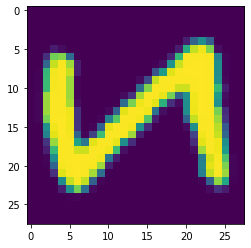

In [5]:
#matplotlib. pyplot is a collection of functions that make matplotlib work like MATLAB
from matplotlib import pyplot as plt
#Display a random image on a window
plt.imshow(X_train[0])
plt.show

In [6]:
#Y'all can see how an image array looks like. all float values b/w 0 and 1
m = X_train[2]
print(m)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### Now we perform Image preprocessing. We reverse and rotate all train and test images

<function matplotlib.pyplot.show(close=None, block=None)>

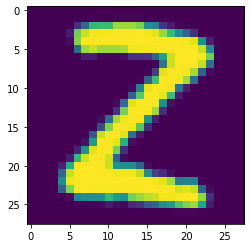

In [7]:
#for train data
for t in range(697932):
    X_train[t]=np.transpose(X_train[t])
    
#checking
plt.imshow(X_train[0])
plt.show

Process Complete: Rotated and reversed test and train images!


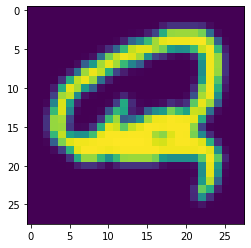

In [7]:


#for test data  
for t in range(116323):
    X_test[t]=np.transpose(X_test[t])

#checking
plt.imshow(X_test[1])
plt.show

print('Process Complete: Rotated and reversed test and train images!')

<function matplotlib.pyplot.show(close=None, block=None)>

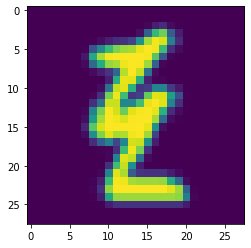

In [9]:
#Checking the last train image
m = X_train[697931]
plt.imshow(m)
plt.show

### Reshaping train and test data again for input into model

In [10]:
X_train = X_train.reshape(X_train.shape[0], 784,1)
X_test = X_test.reshape(X_test.shape[0], 784,1)

### Creation of model

In [11]:
#from keras.models import Sequential 
from tensorflow.keras import Sequential #A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
from keras import optimizers #optimizers are used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses.
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM
from keras import backend as K # runs the computation graph that we have created in the code, taking input from the first parameter and extracting the number of outputs as per the layers mentioned in the second parameter
from keras.constraints import maxnorm

def resh(ipar):
    opar = []
    for image in ipar:
        opar.append(image.reshape(-1)) #it finds unknown dimension that the reshape() function calculates
    return np.asarray(opar)

from keras.utils import np_utils #converts array of labeled data into vector form 

train_images = X_train.astype('float32') # to change the dataype of given object
test_images = X_test.astype('float32')

train_images = resh(train_images)
test_images = resh(test_images)


train_labels = np_utils.to_categorical(y_train, 62)
test_labels = np_utils.to_categorical(y_test, 62)


K.set_learning_phase(1)

model = Sequential()

model.add(Reshape((28,28,1), input_shape=(784,)))

#add the layer below for an accuracy
model.add(Convolution2D(32, (5,5), input_shape=(28,28,1),
                             activation='relu',padding='same',
                             kernel_constraint=maxnorm(3)))
model.add(Convolution2D(32, (5,5),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))


 




model.add(Flatten())




#model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3))) #Dense Layer is used to classify image based on output from convolutional layers.
#relu is a non linear function used to give a function output directly as positive otherwise as 0


model.add(Dropout(0.5))

model.add(Dense(62, activation='softmax'))# gives probabilty of the model

#opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
#opt = optimizers.Adadelta()
opt =tf.keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) #Used as a loss function for multi-class classification model where there are two or more output labels.

Using TensorFlow backend.


Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


### Training of model and evaluation

In [12]:
print(model.summary())
history = model.fit(train_images,train_labels,validation_data=(test_images, test_labels), batch_size=128, epochs=20)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               2359808   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0

In [13]:
#evaluating model on test data. will take time
scores = model.evaluate(test_images,test_labels, verbose = 0)
print("Accuracy: %.2f%%"%(scores[1]*100))

Accuracy: 87.12%


## Creating model history graphs

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


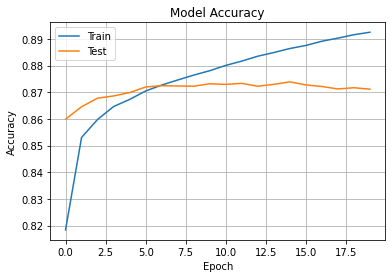

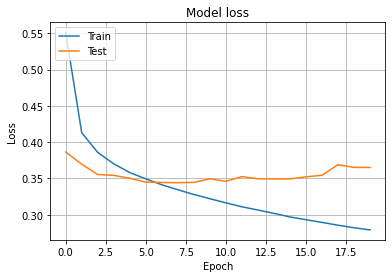

In [14]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

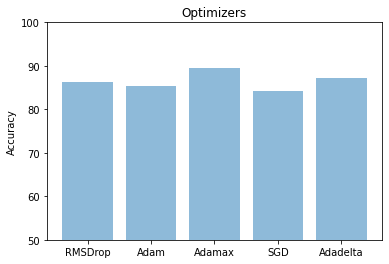

In [15]:
objects = ('RMSDrop', 'Adam', 'Adamax', 'SGD', 'Adadelta')
y_pos = np.arange(len(objects))
performance = [86.2,85.39,89.53,84.29,87.11]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Optimizers')
plt.ylim(50,100)
plt.show()

## Predicting a single image using the model

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
prediction: [7]


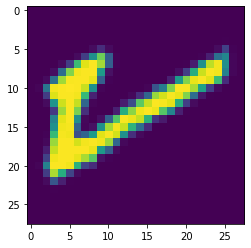

In [16]:
m = X_test[258].reshape(28,28)
plt.imshow(m)
plt.show
print('prediction: '+str(model.predict_classes(X_test[258].reshape(1,784))))

## Saving the model

In [17]:
from keras.models import load_model
from keras.models import model_from_json

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
#saves the model info as json file
    
model.save_weights("model.h5")
# Creates a HDF5 file 'model.h5'

# For usage of this model to predict words, open segment.ipynb